In [1]:
# 4) 
# a)Quantidade de demissões por tipo, tipo movimentação / demissão.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import matplotlib as mpl
import seaborn as sb

In [3]:
sb.set(style="whitegrid")

In [4]:
# lista de todos os arquivos
caged_files = sorted(glob('..\DadosCaged\CAGEDMOV*.txt'))
main_df = pd.concat((pd.read_csv(file, sep=';') for file in caged_files), ignore_index=True)

In [5]:
#Lista todos os arquivos carregados e concatenados no dataframe pandemia_df
caged_files

['..\\DadosCaged\\CAGEDMOV202001.txt',
 '..\\DadosCaged\\CAGEDMOV202002.txt',
 '..\\DadosCaged\\CAGEDMOV202003.txt',
 '..\\DadosCaged\\CAGEDMOV202004.txt',
 '..\\DadosCaged\\CAGEDMOV202005.txt',
 '..\\DadosCaged\\CAGEDMOV202006.txt',
 '..\\DadosCaged\\CAGEDMOV202007.txt',
 '..\\DadosCaged\\CAGEDMOV202008.txt',
 '..\\DadosCaged\\CAGEDMOV202009.txt',
 '..\\DadosCaged\\CAGEDMOV202010.txt',
 '..\\DadosCaged\\CAGEDMOV202011.txt',
 '..\\DadosCaged\\CAGEDMOV202012.txt',
 '..\\DadosCaged\\CAGEDMOV202101.txt',
 '..\\DadosCaged\\CAGEDMOV202102.txt',
 '..\\DadosCaged\\CAGEDMOV202103.txt']

In [6]:
#Lista as colunas do dataframe
main_df.columns

Index(['competência', 'região', 'uf', 'município', 'seção', 'subclasse',
       'saldomovimentação', 'cbo2002ocupação', 'categoria', 'graudeinstrução',
       'idade', 'horascontratuais', 'raçacor', 'sexo', 'tipoempregador',
       'tipoestabelecimento', 'tipomovimentação', 'tipodedeficiência',
       'indtrabintermitente', 'indtrabparcial', 'salário', 'tamestabjan',
       'indicadoraprendiz', 'fonte'],
      dtype='object')

In [7]:
#Alteração dos valores numéricos para valores legíveis.
sex = {1: 'Homem',3 :'Mulher', 9: 'Nao Identificado'}
saldomovimentacao = {1: 'admissao', -1: 'demissao'}
racacor = {1: 'Branca',2: 'Preta',3: 'Parda', 4: 'Amarela',5 : 'Indigena',6:'Nao Informada',  9: 'Nao Identificado'}
tipomovimentacao = {10:'Admissão por Primeiro Emprego',
20:'Admissão por Reemprego', 
25:'Admissão por contrato trabalho prazo determinado',
31:'Desligamento por Demissão sem Justa Causa', 
32:'Desligamento por Demissão com Justa Causa', 
33:'Culpa Recíproca',
35:'Admissão por Reintegraçao', 
40:'Desligamento a Pedido',
43:'Término contrato trabalho prazo determinado',
45:'Desligamento por Término de Contrato',
50:'Desligamento por Aposentadoria', 
60:'Desligamento por morte',
70:'Admissão por Transferência', 
80:'Desligamento por Transferência', 
90:'Desliamento por Acordo Empregado e Empregador',
98:'Desligamento de Tipo Ignorado',
99:'Não Identificado'}

In [8]:
#Aplicação dos dics criados para deixar os dados mais legíveis
main_df['sexo'] = main_df['sexo'].apply(lambda x: sex[x])
main_df['saldomovimentação'] = main_df['saldomovimentação'].apply(lambda x: saldomovimentacao[x])
main_df['raçacor'] = main_df['raçacor'].apply(lambda x: racacor[x])
main_df['tipomovimentação'] = main_df['tipomovimentação'].apply(lambda x: tipomovimentacao[x])

In [9]:
#Exibição dos ultimos 5 registros
main_df.tail()

,competência,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,tipoempregador,tipoestabelecimento,tipomovimentação,tipodedeficiência,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,fonte
39694383,202103,3,35,355030,A,151201,admissao,724315,102,7,...,2,3,Admissão por Primeiro Emprego,0,0,0,1500.000000,99,0,1
39694384,202103,3,35,355030,I,5620101,admissao,513205,111,7,...,0,1,Admissão por Reemprego,0,1,0,6567.000000,7,0,1
39694385,202103,2,25,251370,C,1532700,demissao,764105,101,7,...,0,1,Desligamento por Demissão sem Justa Causa,0,0,0,1122.000000,10,0,1
39694386,202103,3,33,330455,I,5510801,demissao,513505,101,6,...,0,1,Desligamento por Demissão sem Justa Causa,0,0,0,1021.419983,5,0,1
39694387,202103,3,35,354980,G,4530701,demissao,142105,101,9,...,0,1,Desligamento por Demissão sem Justa Causa,0,0,0,4500.000000,4,0,1


In [10]:
demissoes = main_df['saldomovimentação'] == "demissao"
demissoes_df = main_df[demissoes]

In [11]:
tipo_demissao_df = demissoes_df[['tipomovimentação']].value_counts()
tipo_demissao_df = tipo_demissao_df.rename_axis('tipomovimentação').reset_index(name='numerodemissões')
tipo_demissao_df

,tipomovimentação,numerodemissões
0,Desligamento por Demissão sem Justa Causa,10523938
1,Desligamento a Pedido,4865393
2,Término contrato trabalho prazo determinado,3109550
3,Desligamento por Demissão com Justa Causa,245345
4,Desliamento por Acordo Empregado e Empregador,230901
5,Desligamento por Término de Contrato,168970
6,Não Identificado,107306
7,Desligamento por morte,85910
8,Culpa Recíproca,27037
9,Desligamento por Aposentadoria,19429


Text(0, 0.5, '\nTipo de movimentação\n')

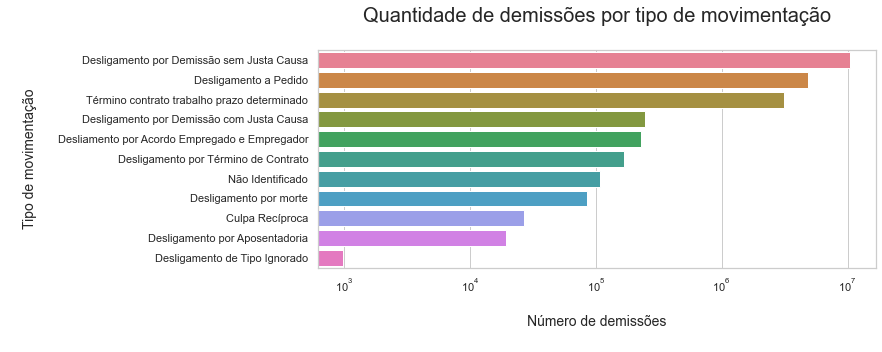

In [12]:
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sb.barplot(x='numerodemissões', y='tipomovimentação', data = tipo_demissao_df, dodge=False, palette='husl')
ax.set_xscale("log")
ax.set_title("Quantidade de demissões por tipo de movimentação\n", fontsize = 20)
ax.set_xlabel("\nNúmero de demissões\n", fontsize = 14)
ax.set_ylabel("\nTipo de movimentação\n", fontsize = 14)

In [13]:
#Total de demissões:
demissoes_df[['saldomovimentação']].value_counts().sort_index()

saldomovimentação
demissao             19384765
dtype: int64